<a href="https://colab.research.google.com/github/saravanankish/GRIP-tasks/blob/main/Task_6_Data_science_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Author: SARAVANAN K**
**Data Science & Business Analytics**

Task 6: Prediction using Decision Tree Algorithm

The Sparks Foundation Intern




Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

Reading the dataset

In [ ]:
from sklearn import datasets

In [ ]:
iris_data = datasets.load_iris()
data = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
data['target'] = iris_data.target
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Understanding the dataset

In [ ]:
data.shape

(150, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Visualizing the Dataset

In [ ]:
iris = sns.load_dataset('iris')

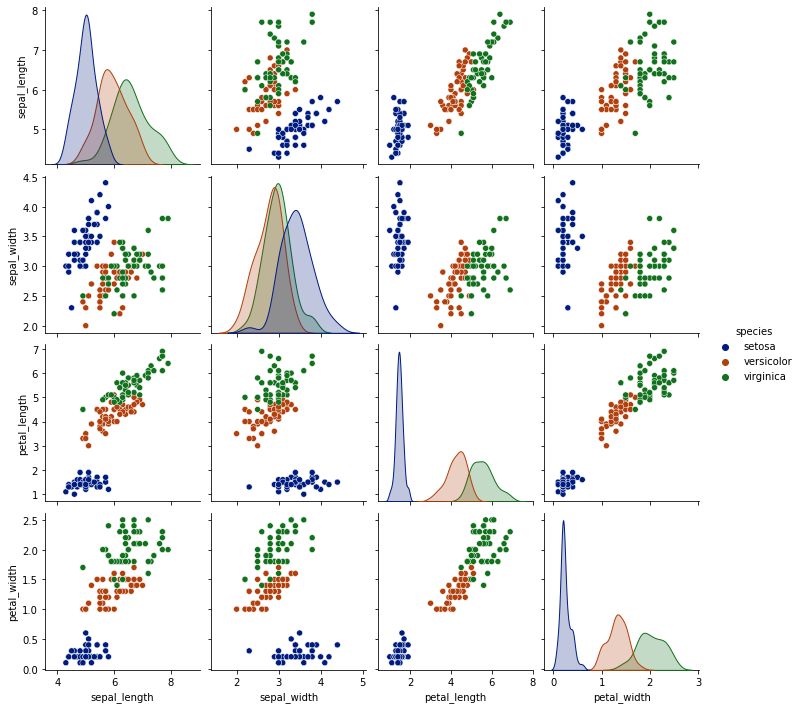

In [ ]:
fig = sns.pairplot(iris, hue = 'species', palette = 'dark')

**Decision Tree Classifier when the data is trained**

Splitting the dataset

In [ ]:
x = data[iris_data.feature_names]
y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

Building Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Predicting using Decision Tree Classifier

In [ ]:
prediction = classifier.predict(x_test)

Accuracy of the model

In [ ]:
from sklearn import metrics
print('Accuracy of the model : ',metrics.accuracy_score(y_test, prediction))

Accuracy of the model :  0.9555555555555556


Visualizing the Decision Tree

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus 

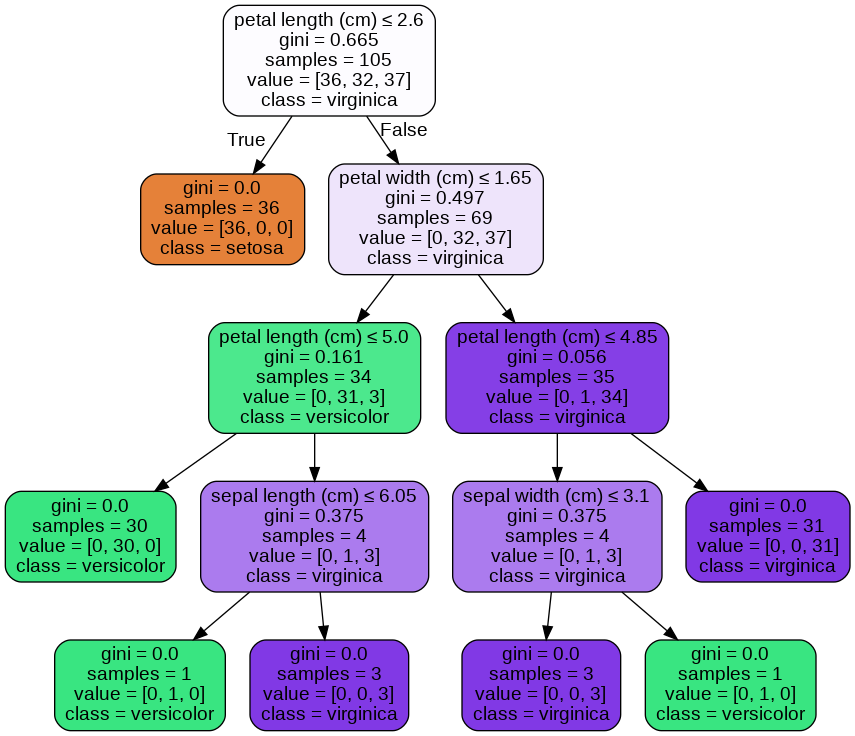

In [ ]:
dot = StringIO()
export_graphviz(classifier, out_file = dot, filled = True, rounded = True, special_characters = True, feature_names = iris_data.feature_names, class_names = iris_data.target_names)
graph = pydotplus.graph_from_dot_data(dot.getvalue())
Image(graph.create_png())

**Decision Tree Classifier when the data is not trained**

Building Decision Tree Classifier

In [ ]:
classifier_1 = DecisionTreeClassifier()
classifier_1.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Visualizing the Decision Tree

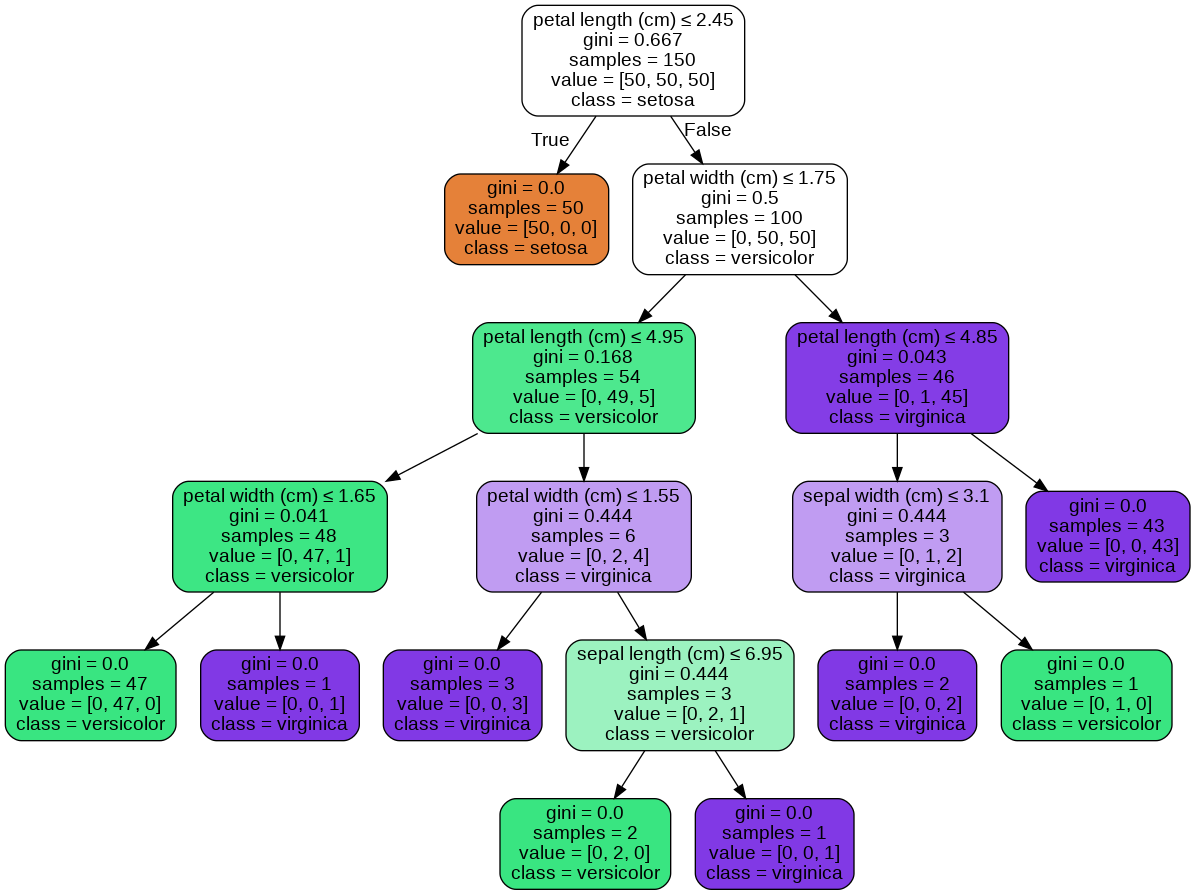

In [ ]:
dot = StringIO()
export_graphviz(classifier_1, out_file = dot, filled = True, rounded = True, special_characters = True, feature_names = iris_data.feature_names, class_names = iris_data.target_names)
graph = pydotplus.graph_from_dot_data(dot.getvalue())
Image(graph.create_png())